In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

/tmp/ipykernel_7291/2216997426.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
files = os.listdir("./pointsFromSVG")
files.sort()
files = files[26:] + files[:26]
files

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [3]:
def np_from_file(filename):
    file_cont = ""
    with open("./pointsFromSVG/" + filename) as rf:
        file_cont = rf.read().strip()

    str_points = [pair.split(",") for pair in file_cont.split("\n")][:-1]
    points = []
    for point in str_points:
        points.append([float(point[0]), float(point[1])])

    return np.array(points)

In [4]:
def zeroed(np_arr):
    arr = np_arr.copy()
    arr_x = arr[:, 0]
    arr_y = arr[:, 1]

    arr_x = arr_x - arr_x.min()
    arr_y = arr_y - arr_y.min()

    points = np.array([arr_x, arr_y]).T

    return points

In [5]:
def get_dims(letter_arr):
    x_arr = letter_arr[:, 0]
    y_arr = letter_arr[:, 1]

    width = x_arr.max() - x_arr.min()
    height = y_arr.max() - y_arr.min()

    return width, height

def get_scale(letter_arr, unit_x, unit_y):
    width, height = get_dims(letter_arr)

    scale_x = (width) / unit_x
    scale_y = (height) / unit_y

    return (scale_x, scale_y, width, height)

In [6]:
all_letters = [zeroed(np_from_file(file)) for file in files]

ax_arr = all_letters[0][:, 0]
ay_arr = all_letters[0][:, 1]
unit_x = ax_arr.max() - ax_arr.min()
unit_y = ay_arr.max() - ay_arr.min()

letter_scales = [
    get_scale(letter_points, unit_x, unit_y) for letter_points in all_letters
]
print(letter_scales)

[(1.0, 1.0, 16.99000000000001, 17.388306884765626), (1.0000000000000067, 1.6683625491689733, 16.990000000000123, 29.00999999999999), (0.7586815773984685, 1.0110242542016739, 12.889999999999986, 17.58), (1.0, 1.6671494494612336, 16.99000000000001, 28.988906249999992), (0.996708951324767, 1.0110242542016734, 16.9340850830078, 17.57999999999999), (1.017068864037667, 1.6683580562070928, 17.279999999999973, 29.00992187499999), (1.0, 1.701718298169939, 16.99000000000001, 29.589999999999996), (1.0000000000000033, 1.6683625491689733, 16.990000000000066, 29.00999999999999), (0.13772807533843953, 1.348032338935565, 2.3400000000000887, 23.439999999999998), (0.9482048263684557, 2.0387263829038305, 16.11000000000007, 35.449999999999996), (0.6032960565038255, 1.6683580562070928, 10.25, 29.00992187499999), (0.10359034726310204, 1.6683580562070928, 1.7600000000001046, 29.00992187499999), (1.896998234255448, 1.0110242542016739, 32.230000000000075, 17.58), (1.0000000000000033, 1.0110197612397929, 16.990

In [7]:
%matplotlib widget

import ipywidgets as widgets

class Labeler:
    def __init__(self, letter_points, letter_scales, out_arr):
        self.output = widgets.Output()
        self.colorMap = ['mediumseagreen', 'plum', 'orange']
        self.letters = letter_points
        self.letter_scales = letter_scales
        self.letter_ind = 0
        self.figure = None
        self.stroke_num = 0
        self.letter_strokes = []
        self.current_stroke = []
        self.out_arr = out_arr

        self.next_stroke_button = widgets.Button(description="next stroke")
        self.next_stroke_button.on_click(self.next_stroke)
        self.next_letter_button = widgets.Button(description="next letter")
        self.next_letter_button.on_click(self.next_letter)
        self.exit_button = widgets.Button(description="exit")
        self.exit_button.on_click(self.exit)
        self.undo_button = widgets.Button(description='undo point')
        self.undo_button.on_click(self.undo_point)

    def __call__(self):
        self.label_letter()

    def undo_point(self, event):
        if len(self.current_stroke) > 0:
            plt.scatter(self.current_stroke[-1][0], self.current_stroke[-1][1], marker='x', color='red')
            self.current_stroke = self.current_stroke[:-1]
        else:
            print('beginning of stroke, cannot undo')


    def next_stroke(self, event):
        self.stroke_num += 1
        self.letter_strokes.append(self.current_stroke)
        self.current_stroke = []
        self.figure.canvas.mpl_connect('button_press_event', self.click_img)

    def click_img(self, event):
        point = (event.xdata, event.ydata)
        print('pressed:', point)
        plt.scatter(event.xdata, event.ydata, c=self.colorMap[self.stroke_num % 3])
        print()
        self.current_stroke.append(point)

    def label_letter(self):
        self.figure = plt.figure(figsize=(8.5 * self.letter_scales[self.letter_ind][0], 8.5 * self.letter_scales[self.letter_ind][1]))
        self.figure.canvas.mpl_connect('button_press_event', self.click_img)
        plt.scatter(self.letters[self.letter_ind][:, 0], -1 * self.letters[self.letter_ind][:, 1], picker=True)
        plt.show()
        display(self.next_stroke_button)
        display(self.next_letter_button)
        display(self.undo_button)
        display(self.exit_button)

    def exit(self, event):
        self.letter_ind = len(self.letters)
        self.next_letter(None)
    
    def next_letter(self, event):
        self.next_stroke(None)
        self.letter_ind += 1
        plt.cla()
        plt.clf()
        plt.close()

        self.out_arr.append([stroke[:] for stroke in self.letter_strokes]) # deepcopy
        
        if self.letter_ind >= len(self.letters):
            print('finished')
        else:
            self.letter_strokes = []
            self.stroke_num = 0
            self.label_letter()


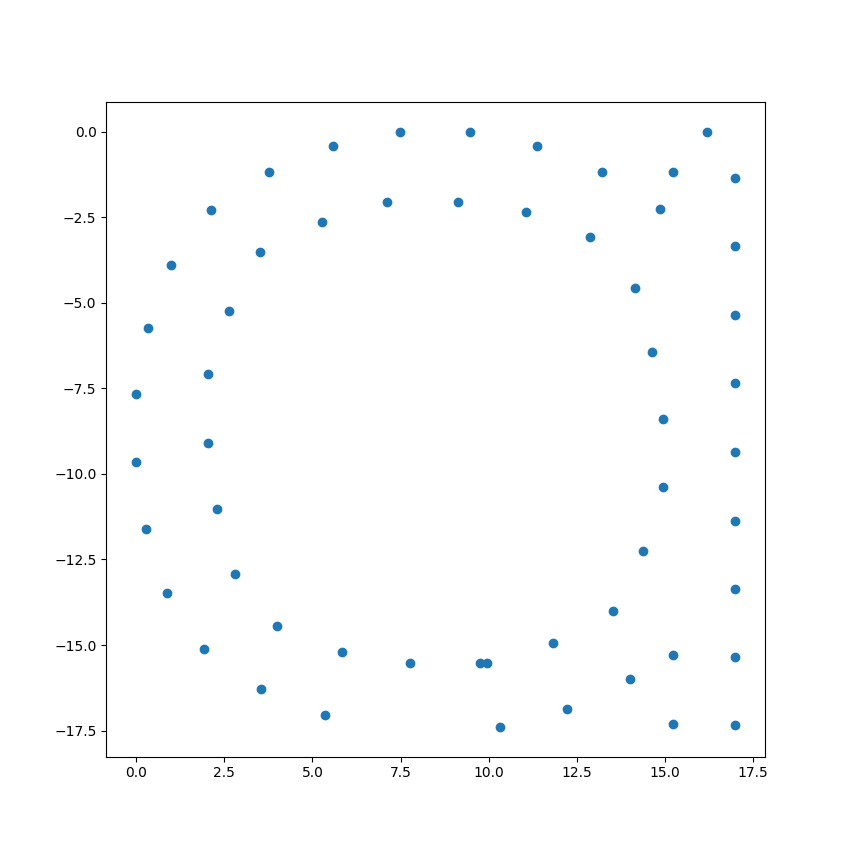

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

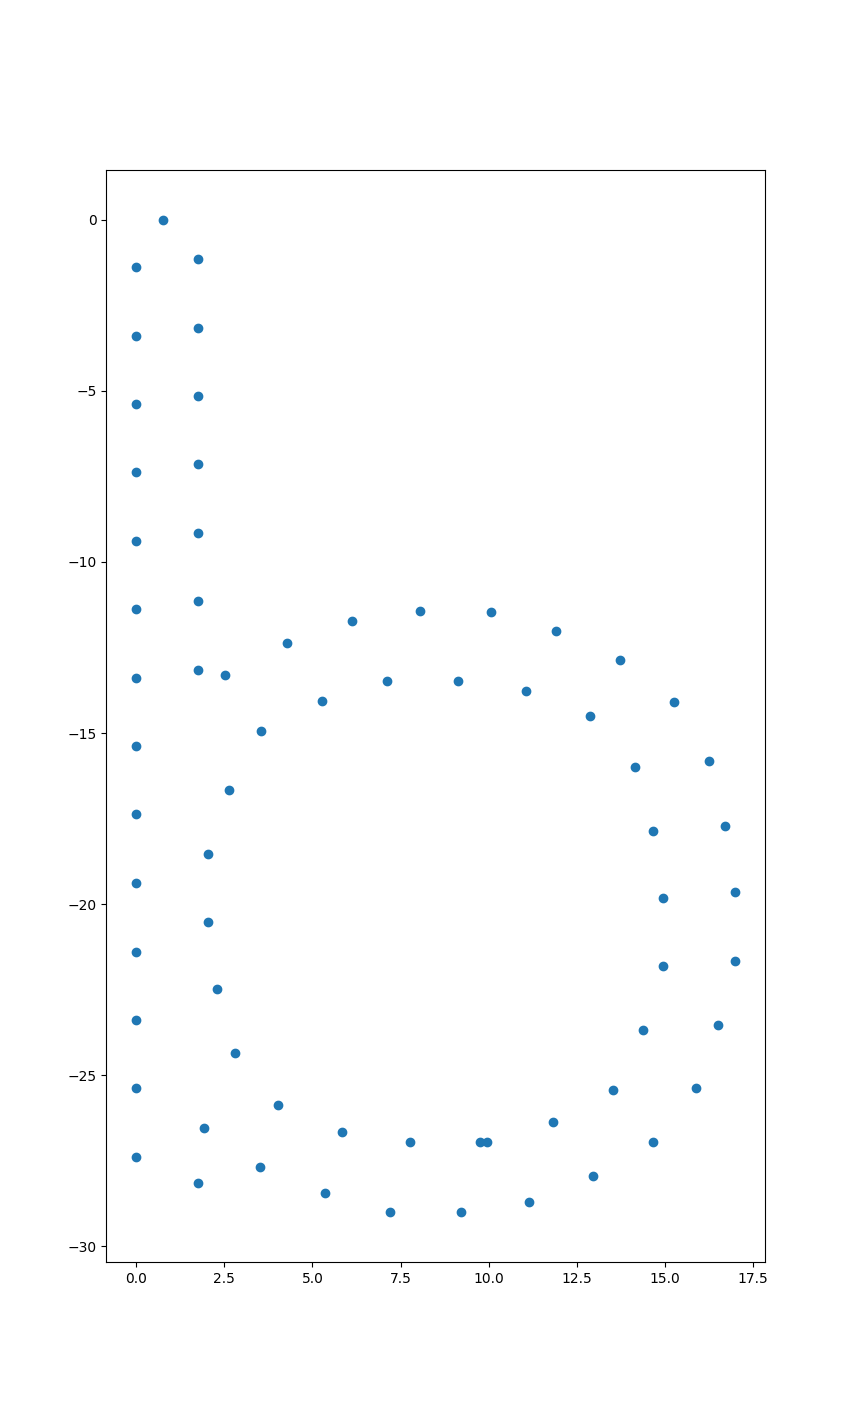

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

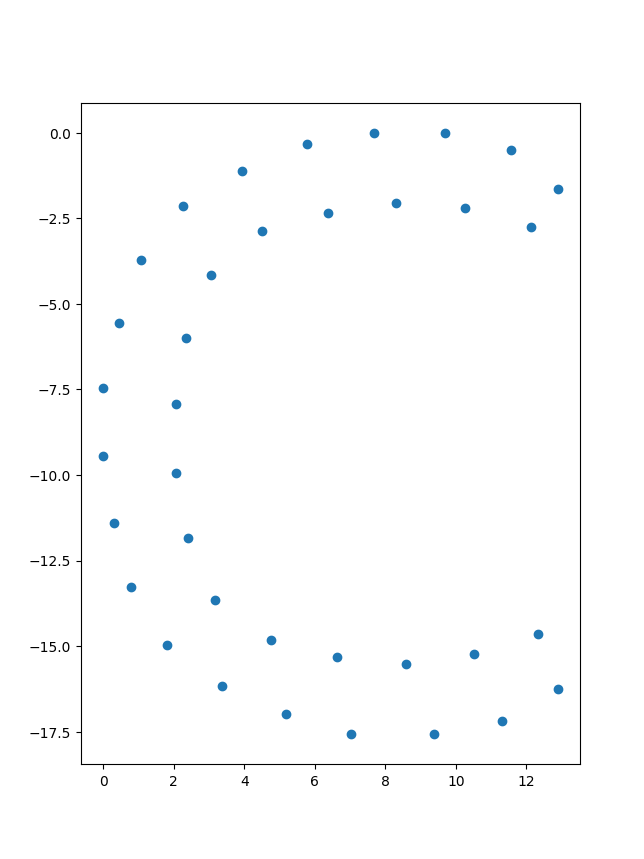

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

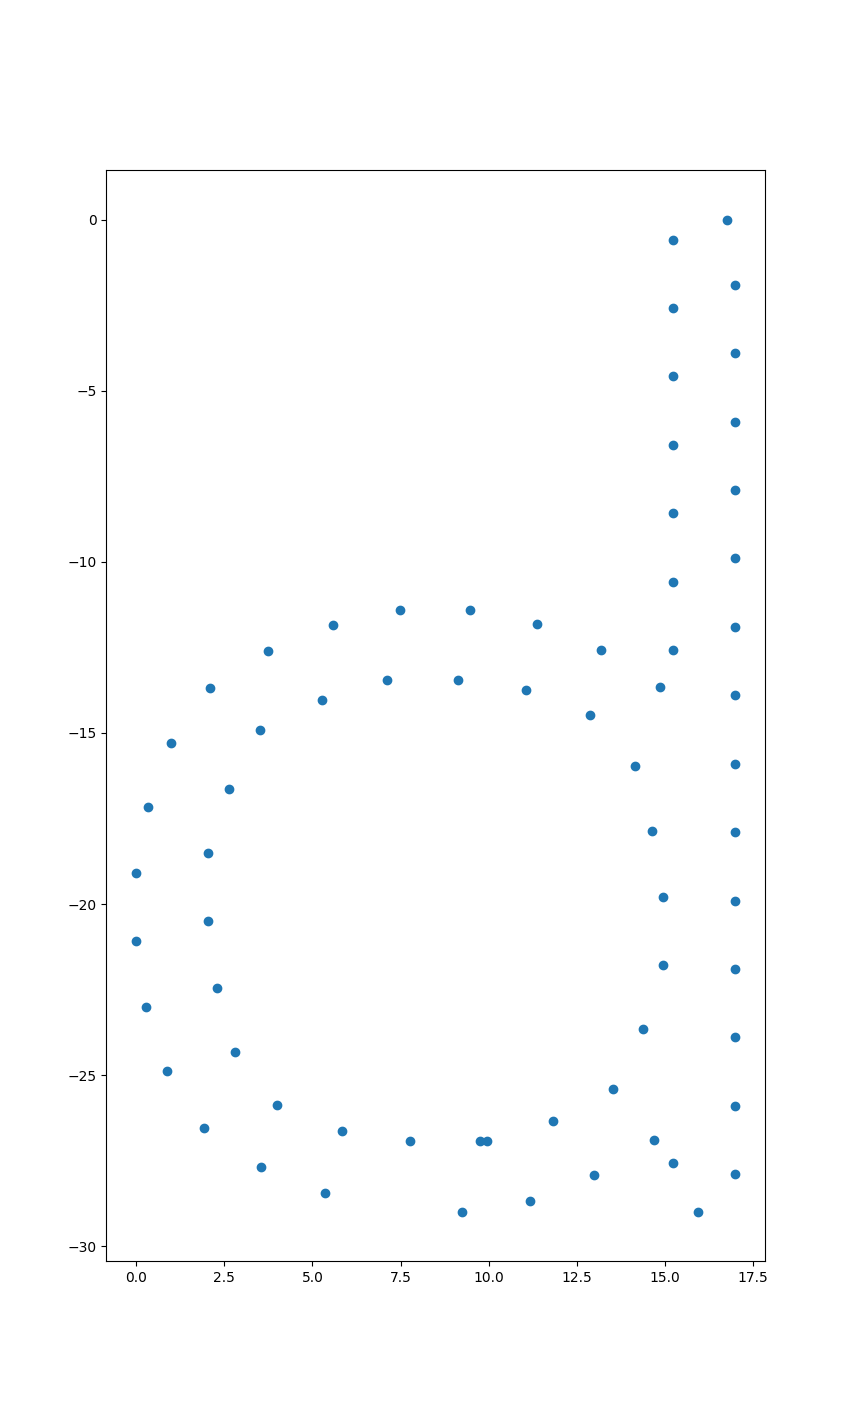

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

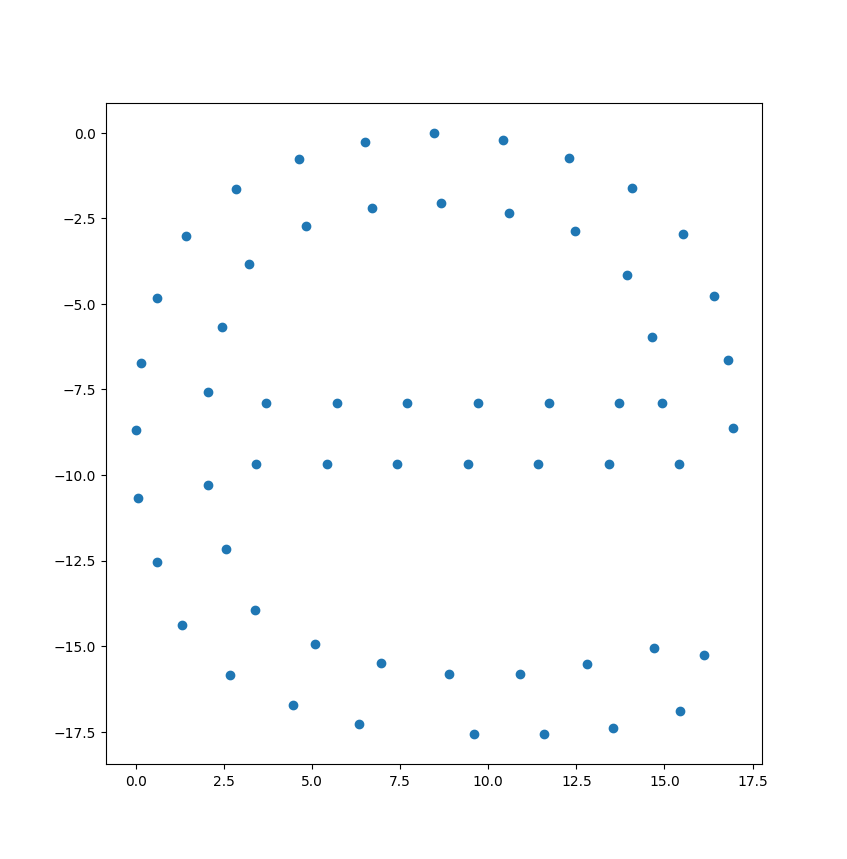

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

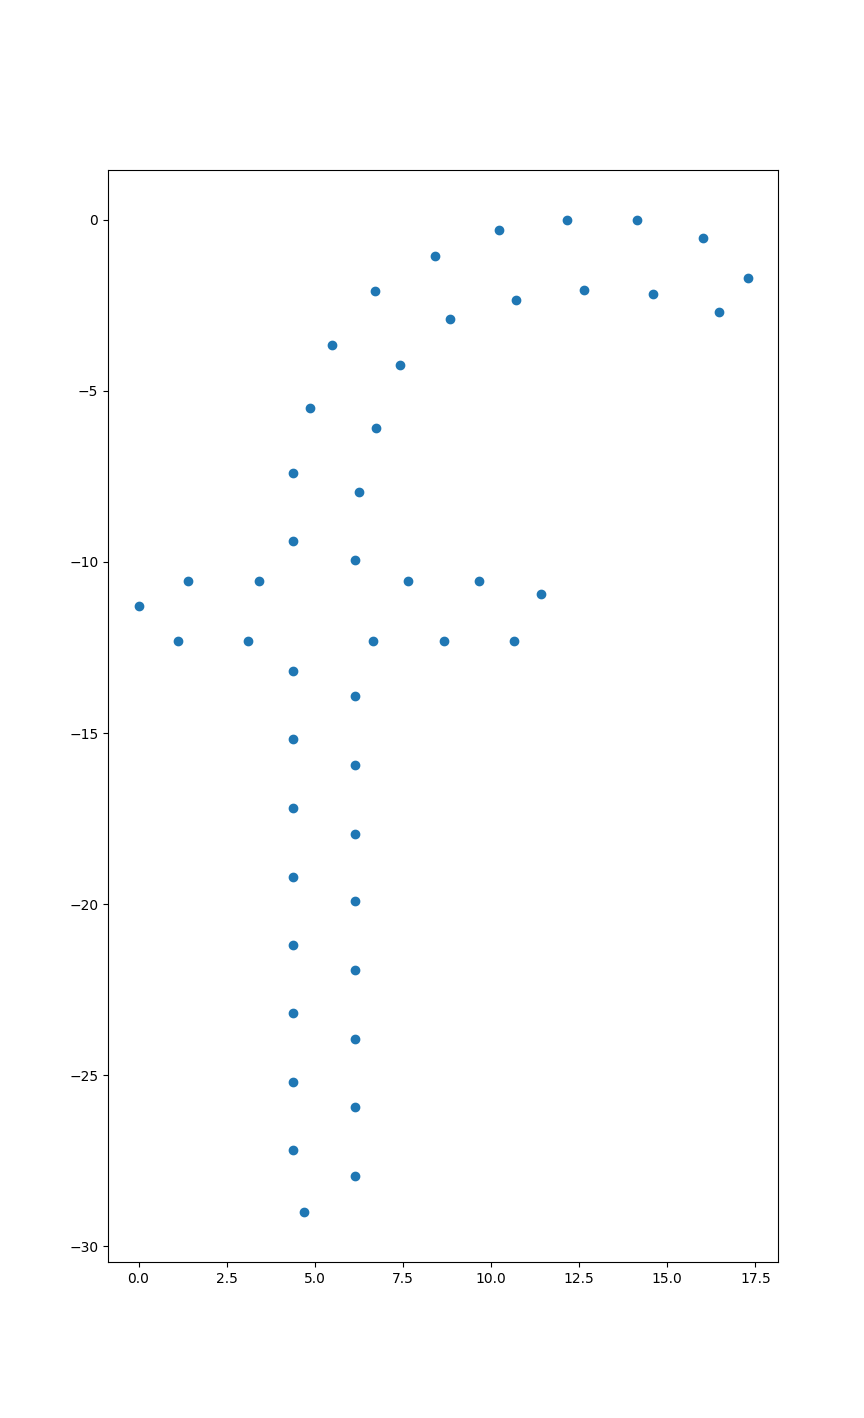

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

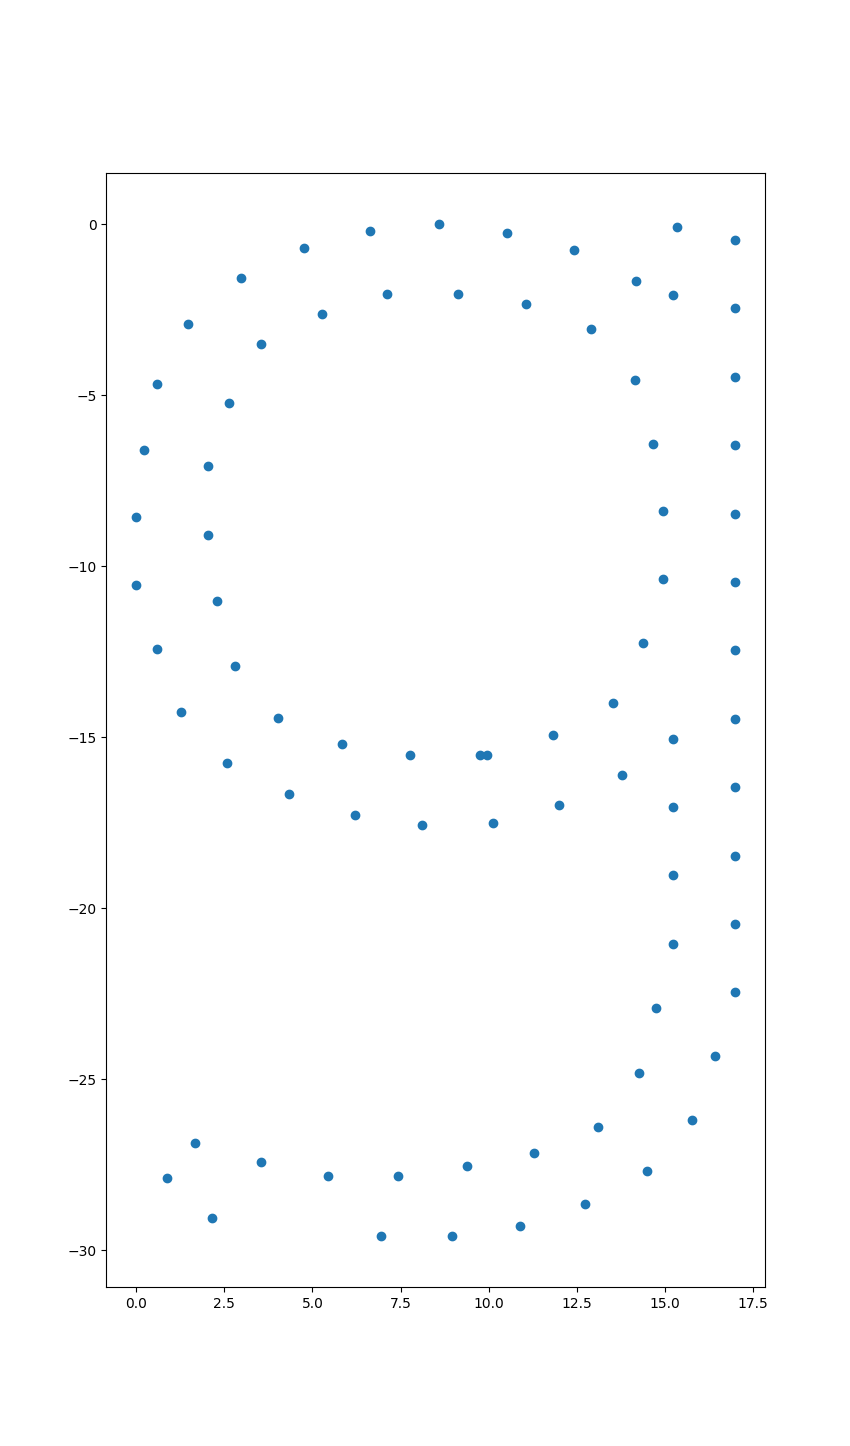

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

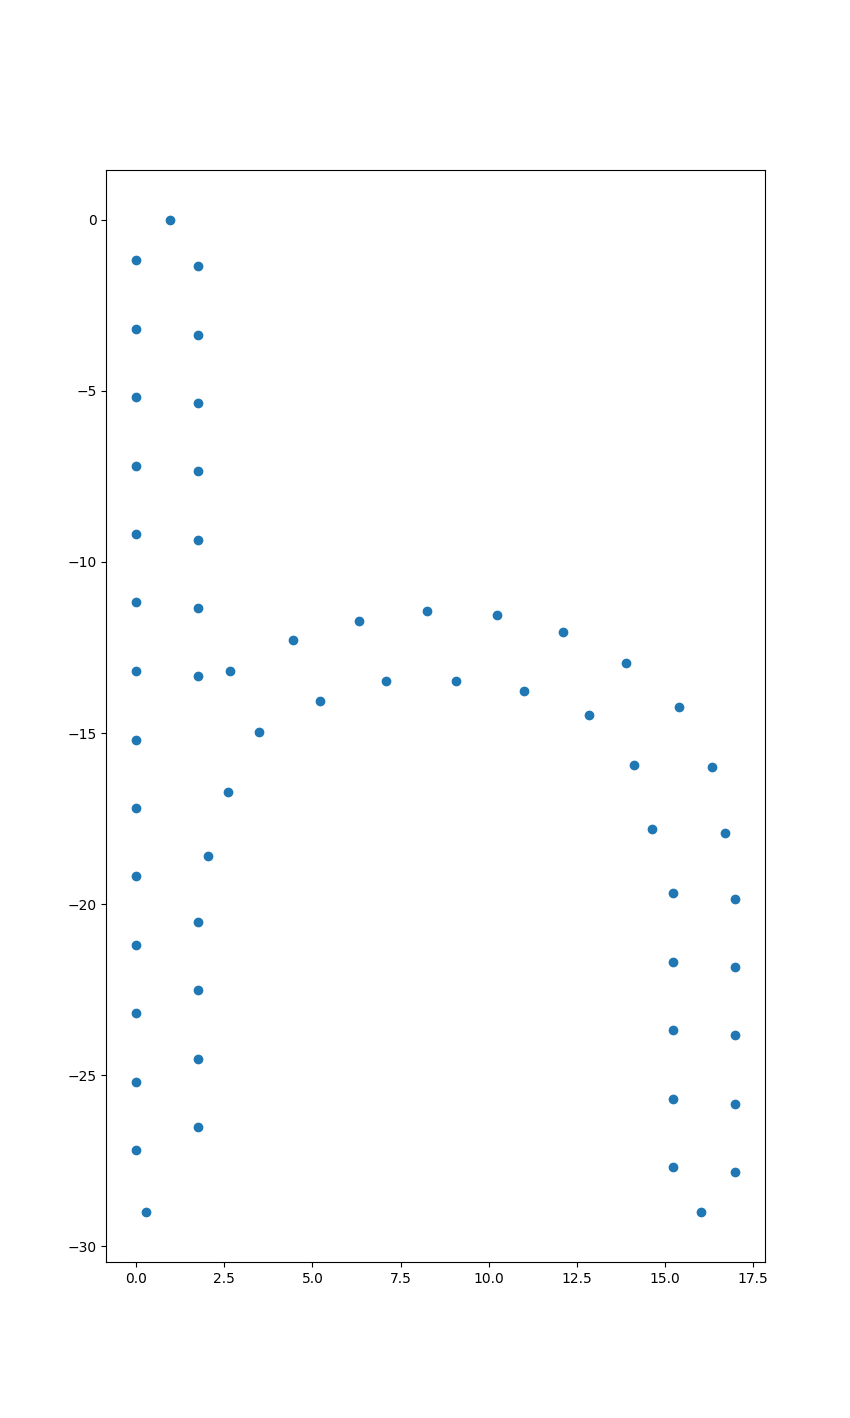

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

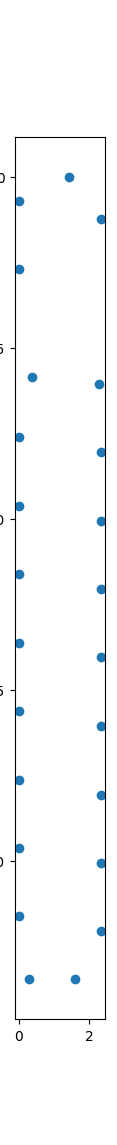

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

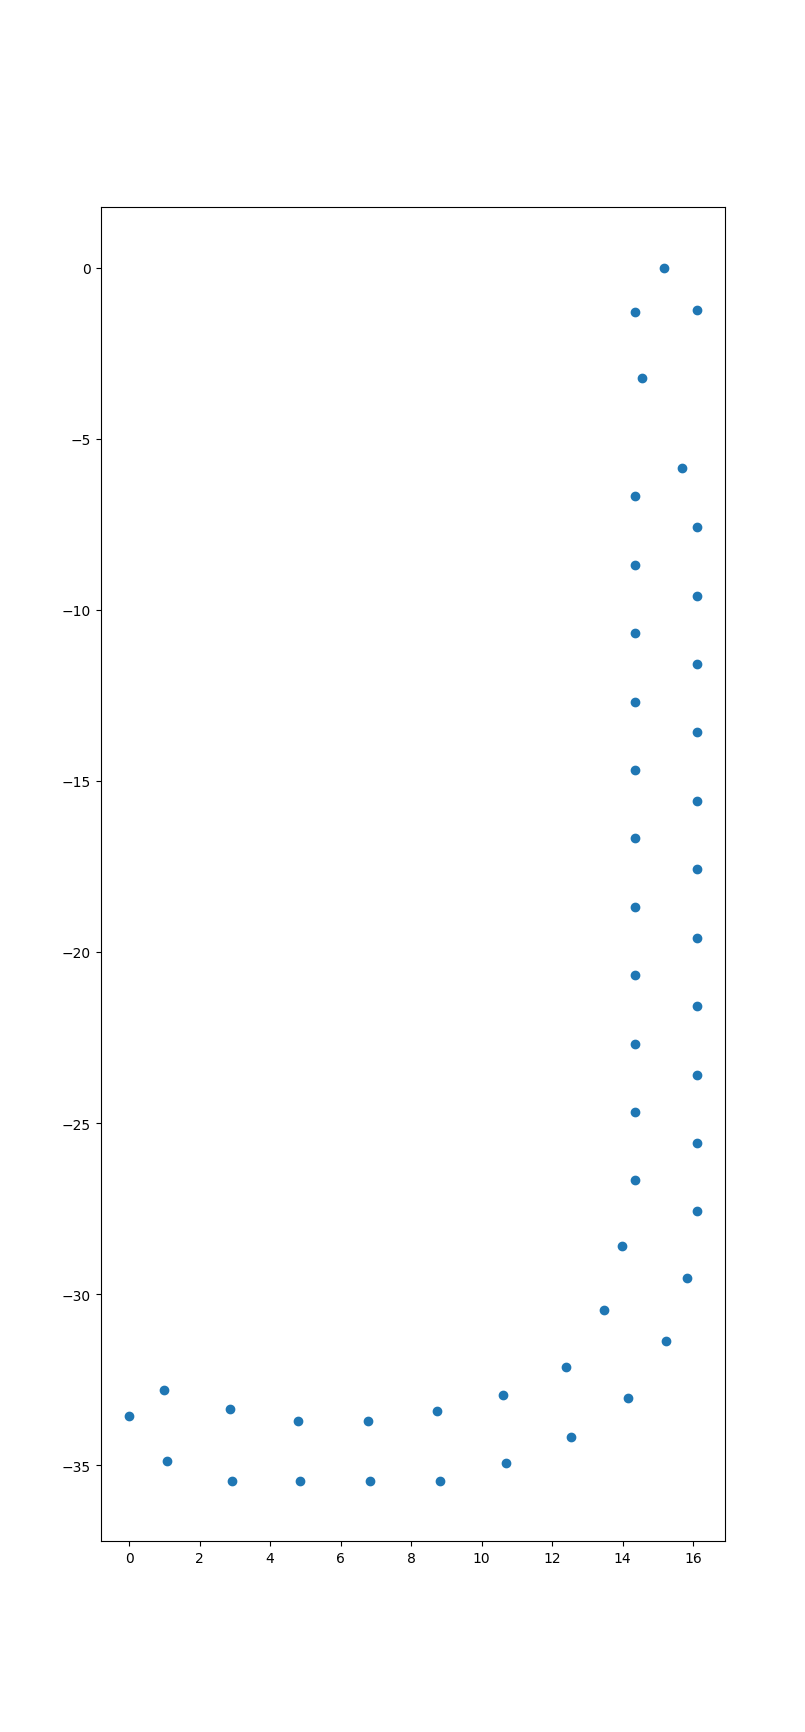

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

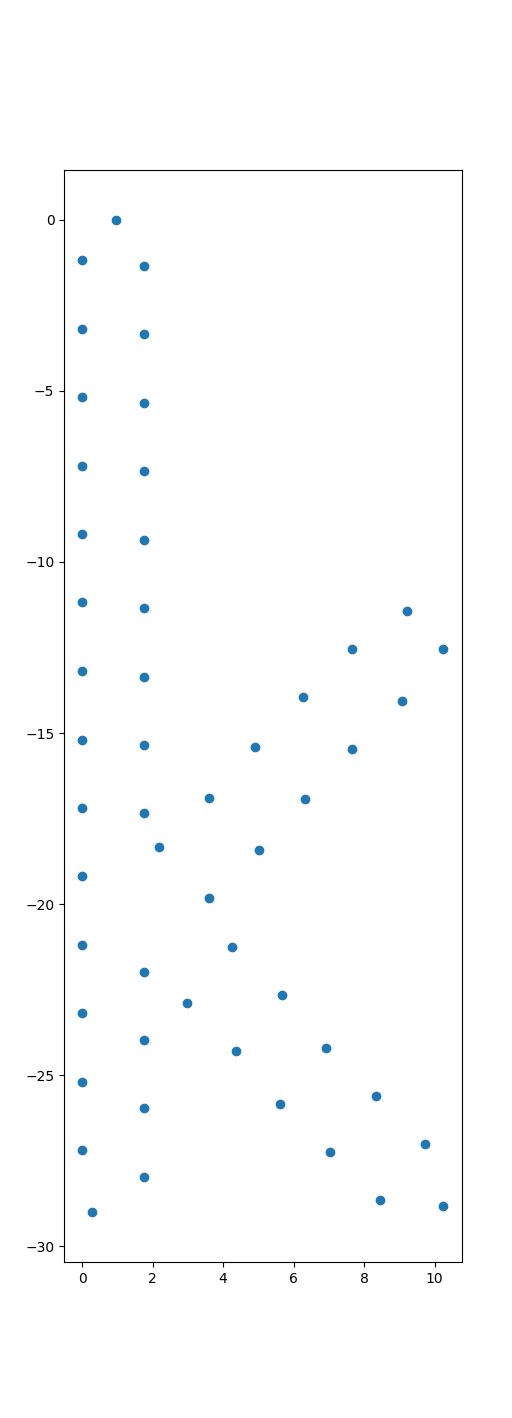

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

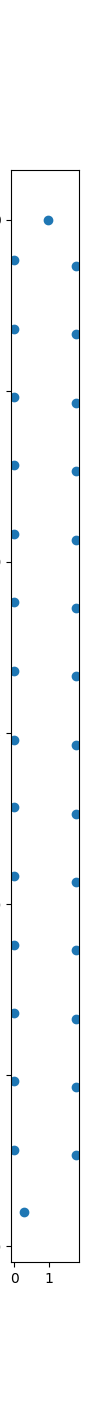

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

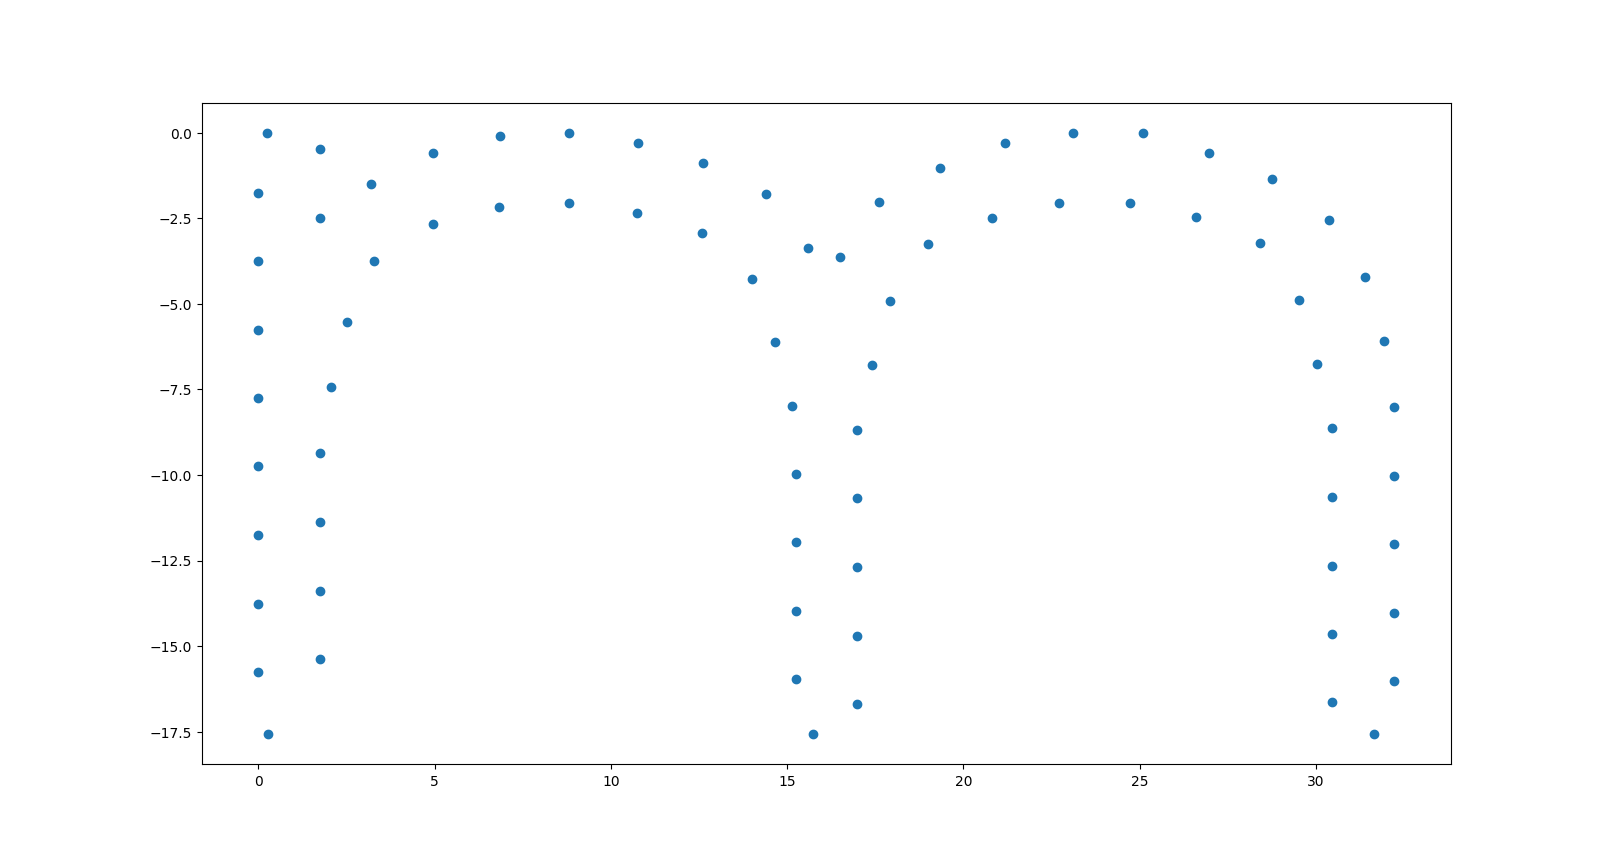

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

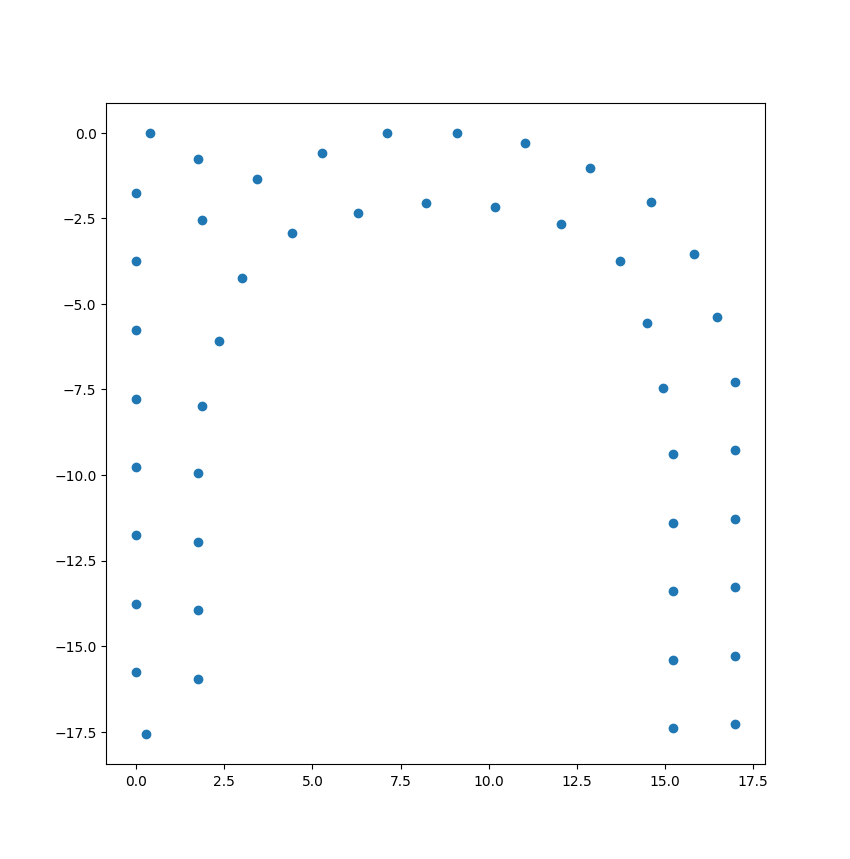

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

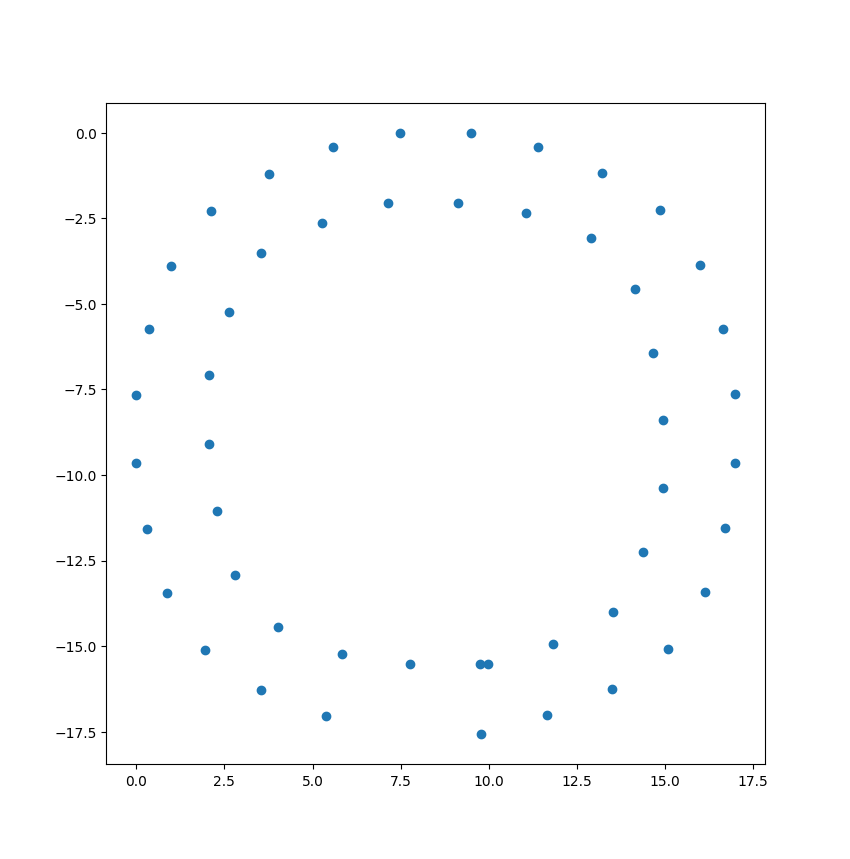

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

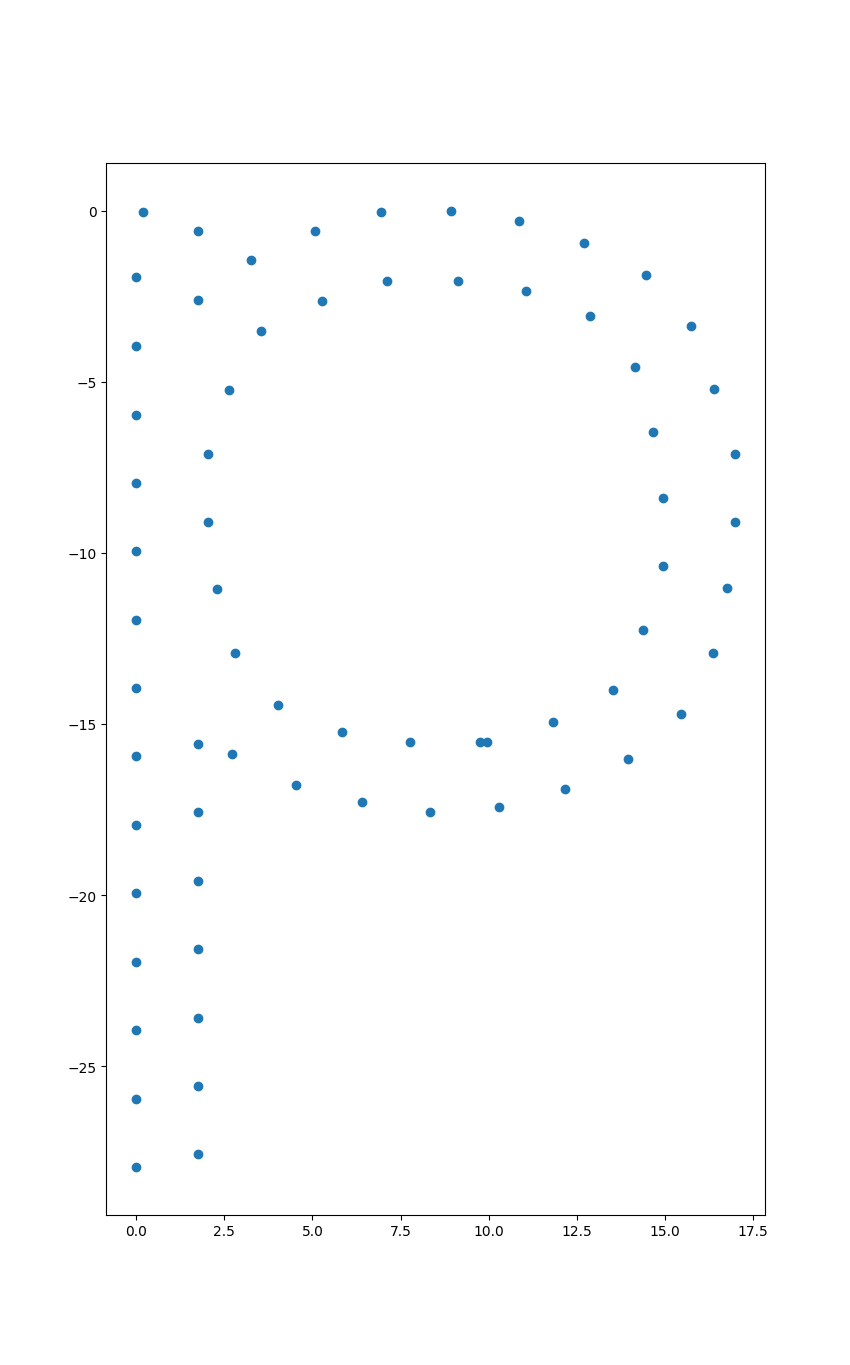

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

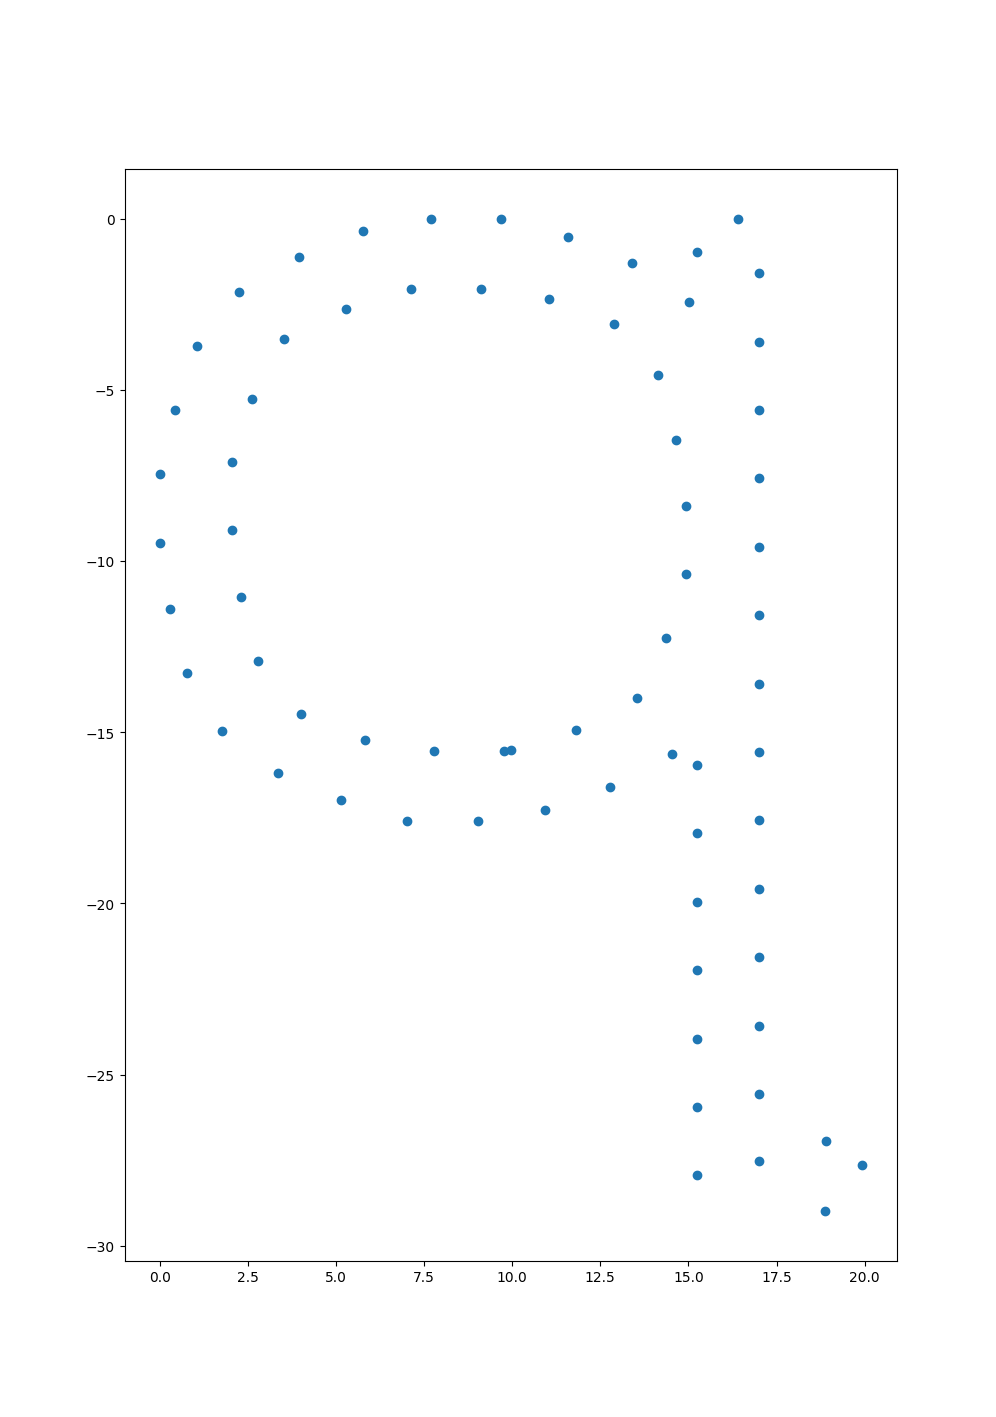

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

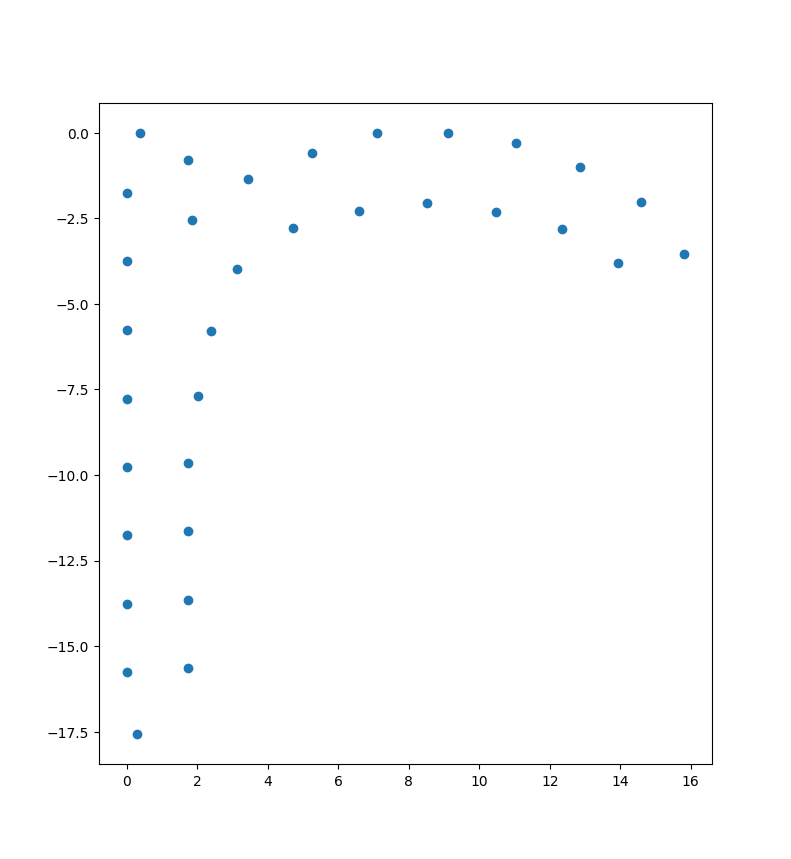

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

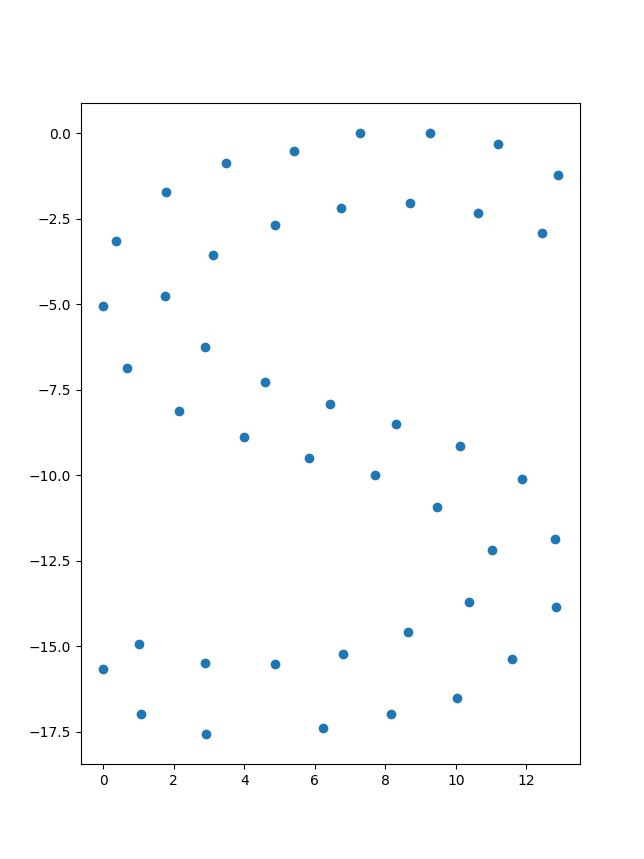

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

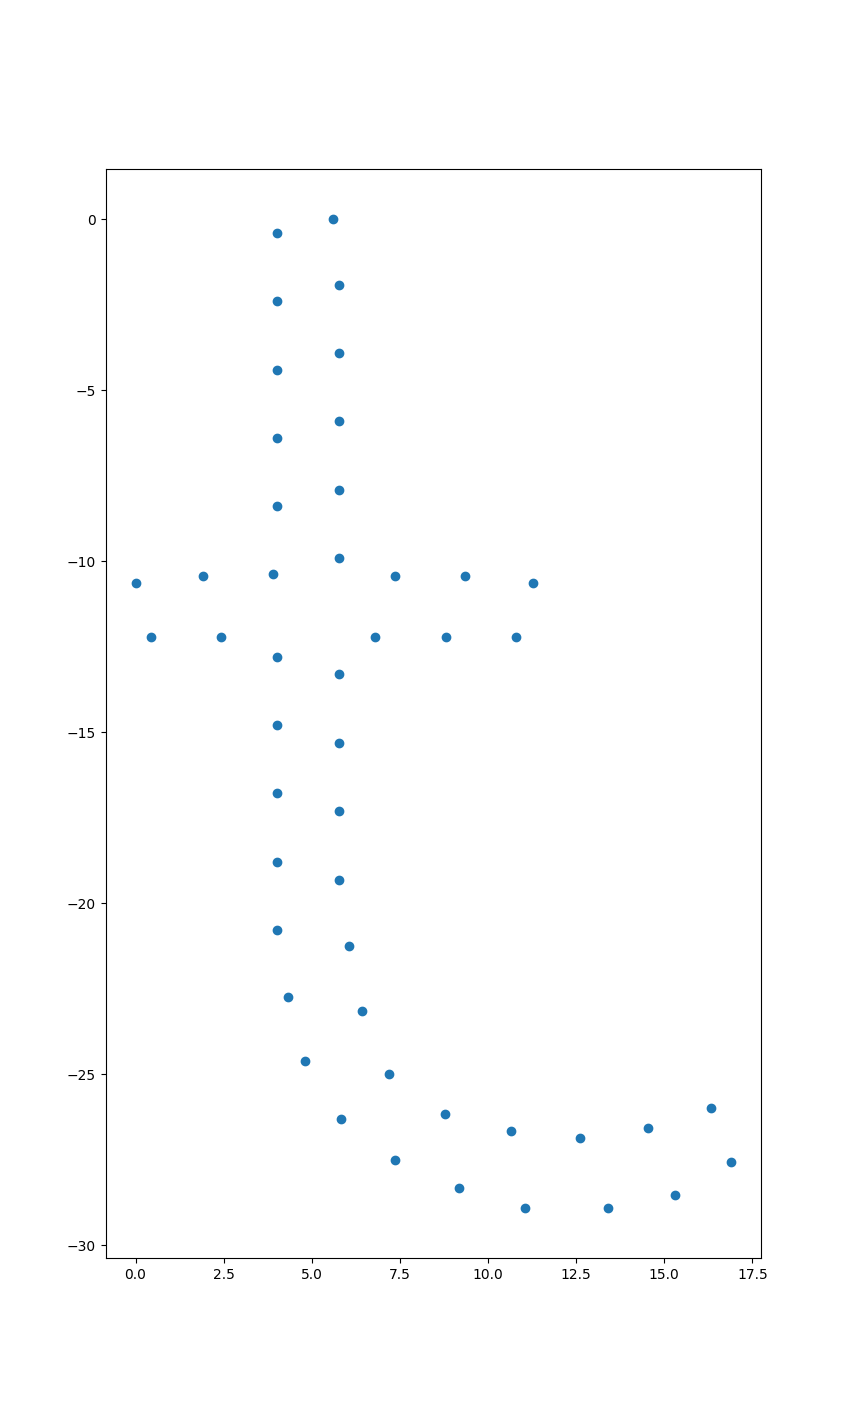

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

pressed: (4.836675604838723, -0.31981415359113186)

pressed: (4.836675604838723, -1.3426557350479271)

pressed: (4.89341640180267, -2.3947213616892142)

pressed: (4.89341640180267, -3.388338897961532)

pressed: (4.950157198766616, -4.586524750525214)

pressed: (4.950157198766616, -5.726262512719934)

pressed: (4.97852759724859, -6.719880048992255)

pressed: (5.006897995730563, -7.713497585264577)

pressed: (4.97852759724859, -8.736339166721379)

pressed: (4.950157198766616, -10.139093335576419)

pressed: (4.950157198766616, -11.337279188140101)

pressed: (4.97852759724859, -12.389344814781385)

pressed: (4.950157198766616, -13.499858531791624)

pressed: (4.950157198766616, -14.610372248801866)

pressed: (4.950157198766616, -15.720885965812109)

pressed: (4.950157198766616, -16.919071818375787)

pressed: (4.950157198766616, -18.175705761308432)

pressed: (4.950157198766616, -19.37389161387211)

pressed: (4.97852759724859, -20.42595724051339)

pressed: (5.205490785104377, -21.62414309307

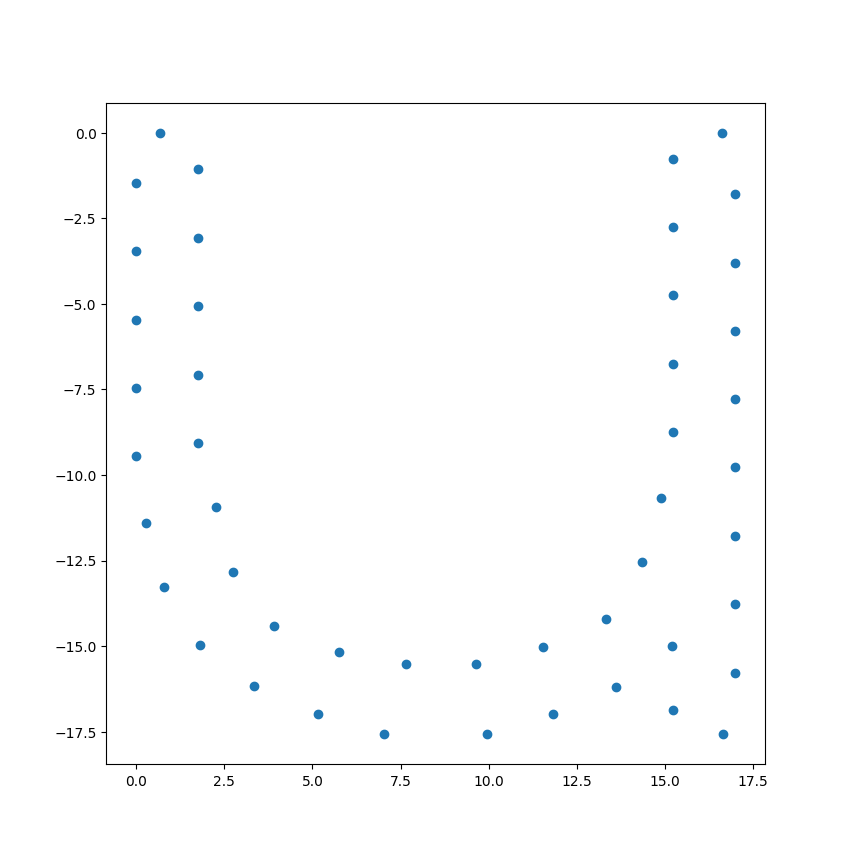

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

pressed: (0.8456313092979131, -0.7246848534335655)

pressed: (0.8740017077798865, -1.9228707059972479)

pressed: (0.9023721062618599, -3.179504648929889)

pressed: (0.8740017077798865, -4.640706908153891)

pressed: (0.9307425047438334, -6.043461077008933)

pressed: (0.9307425047438334, -7.270870974757095)

pressed: (0.9023721062618599, -8.556728962874217)

pressed: (0.9591129032258068, -9.78413886062238)

pressed: (1.2144464895635676, -11.2161170746619)

pressed: (1.7251136622390901, -12.648095288701423)

pressed: (2.179040037950665, -13.846281141265106)

pressed: (3.2287447817836825, -14.869122722721906)

pressed: (4.618894307400382, -15.716620033071827)

pressed: (5.980673434535106, -16.21342880120799)

pressed: (7.711267741935487, -16.38877307231487)

pressed: (9.47023244781784, -16.56411734342175)

pressed: (11.172456356736246, -16.30110093676143)

pressed: (11.172456356736246, -16.21342880120799)

pressed: (12.051938709677424, -15.775068123440787)

pressed: (13.243495445920308, -1

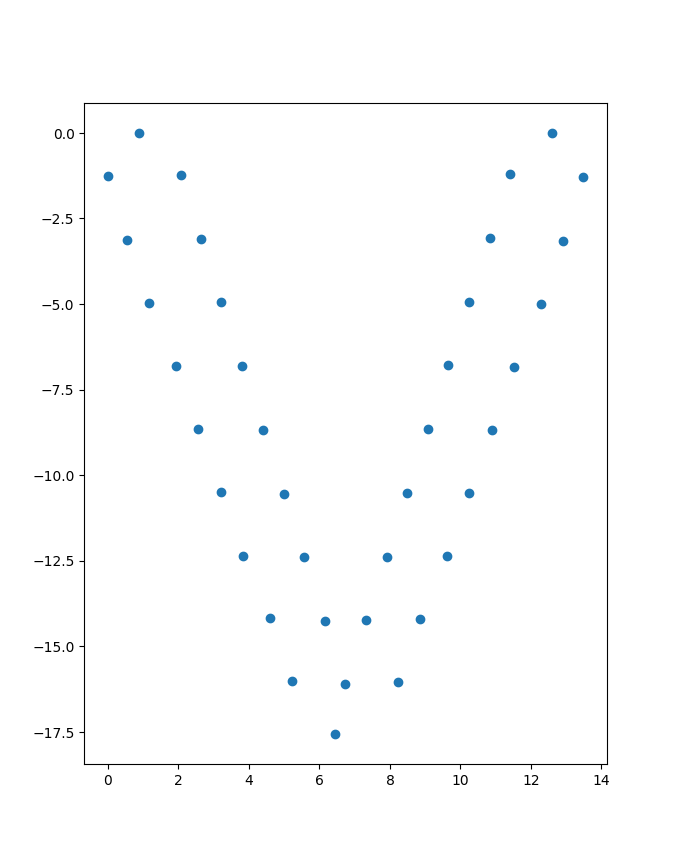

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

pressed: (0.9368874762808375, -0.9298121471244727)

pressed: (1.2205914611005726, -1.7480854122899139)

pressed: (1.5042954459203068, -2.654030813008795)

pressed: (1.8163698292220145, -3.822992620388)

pressed: (2.2986666034155636, -5.05040251813616)

pressed: (2.8377041745730587, -6.511604777360162)

pressed: (3.2348897533206875, -7.972807036584165)

pressed: (3.74555692599621, -9.317113115070248)

pressed: (4.171112903225811, -10.63219514837185)

pressed: (4.568298481973439, -11.859605046120011)

pressed: (4.993854459203041, -12.853222582392332)

pressed: (5.39104003795067, -14.080632480140494)

pressed: (5.816596015180272, -15.045025971228336)

pressed: (6.355633586337767, -15.863299236393777)

pressed: (6.781189563567368, -16.506228230452336)

pressed: (7.518819924098679, -15.512610694180017)

pressed: (7.94437590132828, -14.665113383830096)

pressed: (8.369931878557882, -13.408479440897453)

pressed: (8.965710246679325, -11.830381000935532)

pressed: (9.618229411764714, -9.784697

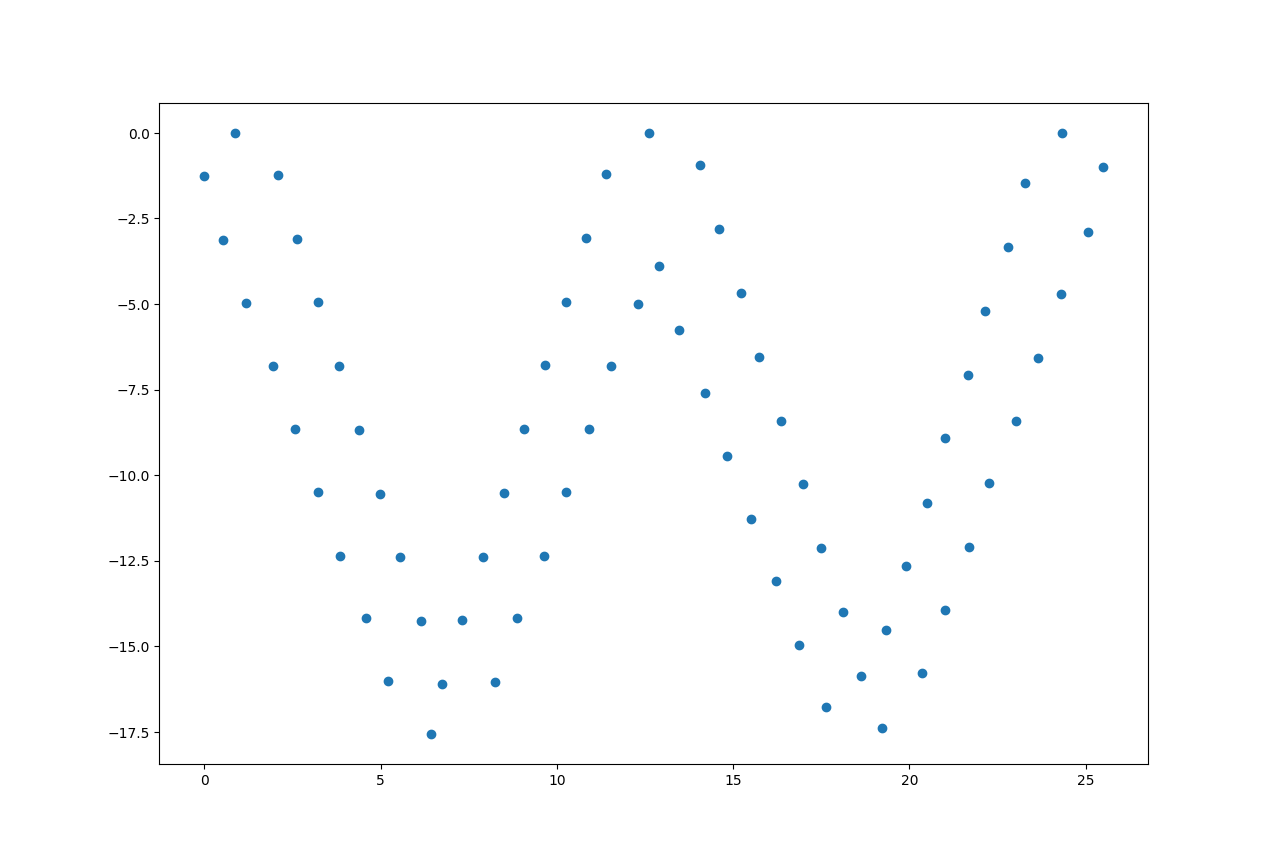

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

pressed: (0.8984946869070303, -1.2805006893382398)

pressed: (1.295680265654659, -2.33256631597952)

pressed: (1.7212362428842605, -3.6476483492811234)

pressed: (2.1184218216318893, -4.787386111475843)

pressed: (2.5439777988614907, -5.839451738117125)

pressed: (2.9411633776091186, -6.833069274389448)

pressed: (3.2816081593928015, -8.08970321732209)

pressed: (3.593682542694509, -9.141768843963371)

pressed: (4.132720113852004, -10.427626832080493)

pressed: (4.586646489563579, -11.771932910566575)

pressed: (5.012202466793182, -12.940894717945776)

pressed: (5.352647248576863, -13.934512254218099)

pressed: (5.863314421252385, -15.1034740615973)

pressed: (6.79953757115751, -16.00941946231618)

pressed: (7.565538330170792, -15.483386648995541)

pressed: (8.132946299810262, -14.255976751247378)

pressed: (8.558502277039864, -12.853222582392336)

pressed: (9.069169449715385, -11.479692458721773)

pressed: (9.494725426944987, -10.164610425420172)

pressed: (9.92028140417459, -8.878752

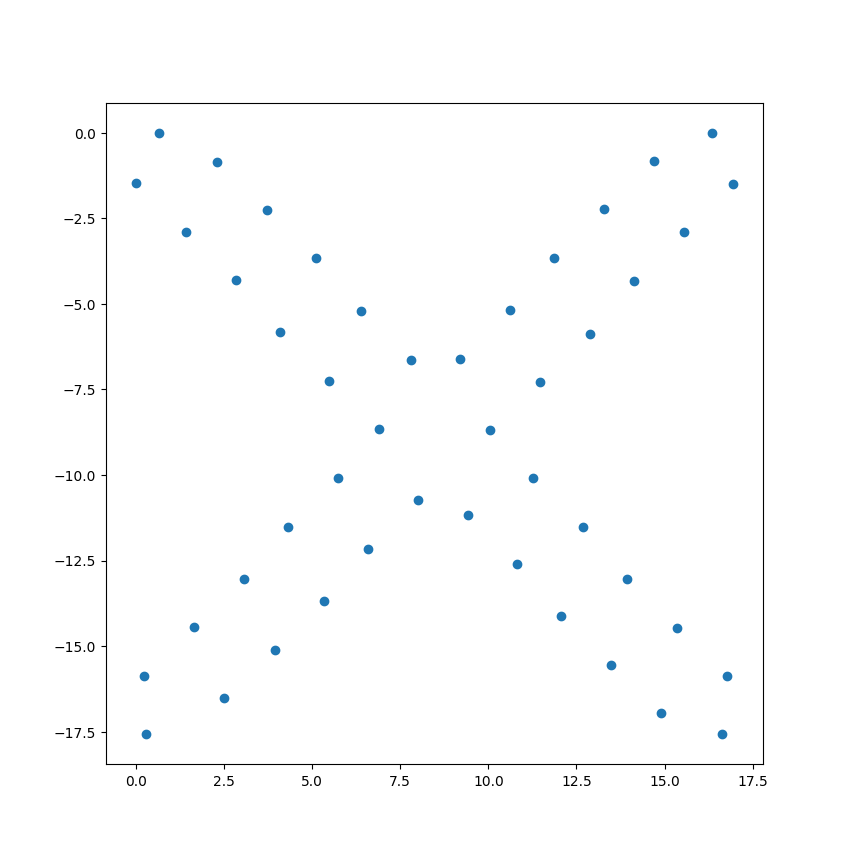

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

pressed: (0.7988327524029621, -0.9292531697249231)

pressed: (1.5648335114162455, -1.7475264348903643)

pressed: (2.472686262839396, -2.595023745240283)

pressed: (3.5791318036363604, -3.4425210555902055)

pressed: (4.515354953541485, -4.465362637047008)

pressed: (5.3380965095187145, -5.5758763540572485)

pressed: (6.302690057905813, -6.598717935514051)

pressed: (7.352394801738829, -7.533887381417413)

pressed: (8.260247553161982, -8.615177053243174)

pressed: (9.480174687886837, -9.521122453962056)

pressed: (10.444768236273937, -10.602412125787819)

pressed: (11.437732183143005, -11.59602966206014)

pressed: (12.232103340638265, -12.560423153147982)

pressed: (13.139956092061414, -13.670936870158222)

pressed: (14.132920038930486, -14.518434180508144)

pressed: (15.012402391871664, -15.395155536042546)

pressed: (15.750032752402973, -16.154980710839027)

pressed: (16.345811120524417, -16.73946161452863)

pressed: (16.345811120524417, -0.8123569889870019)

pressed: (15.4663287675832

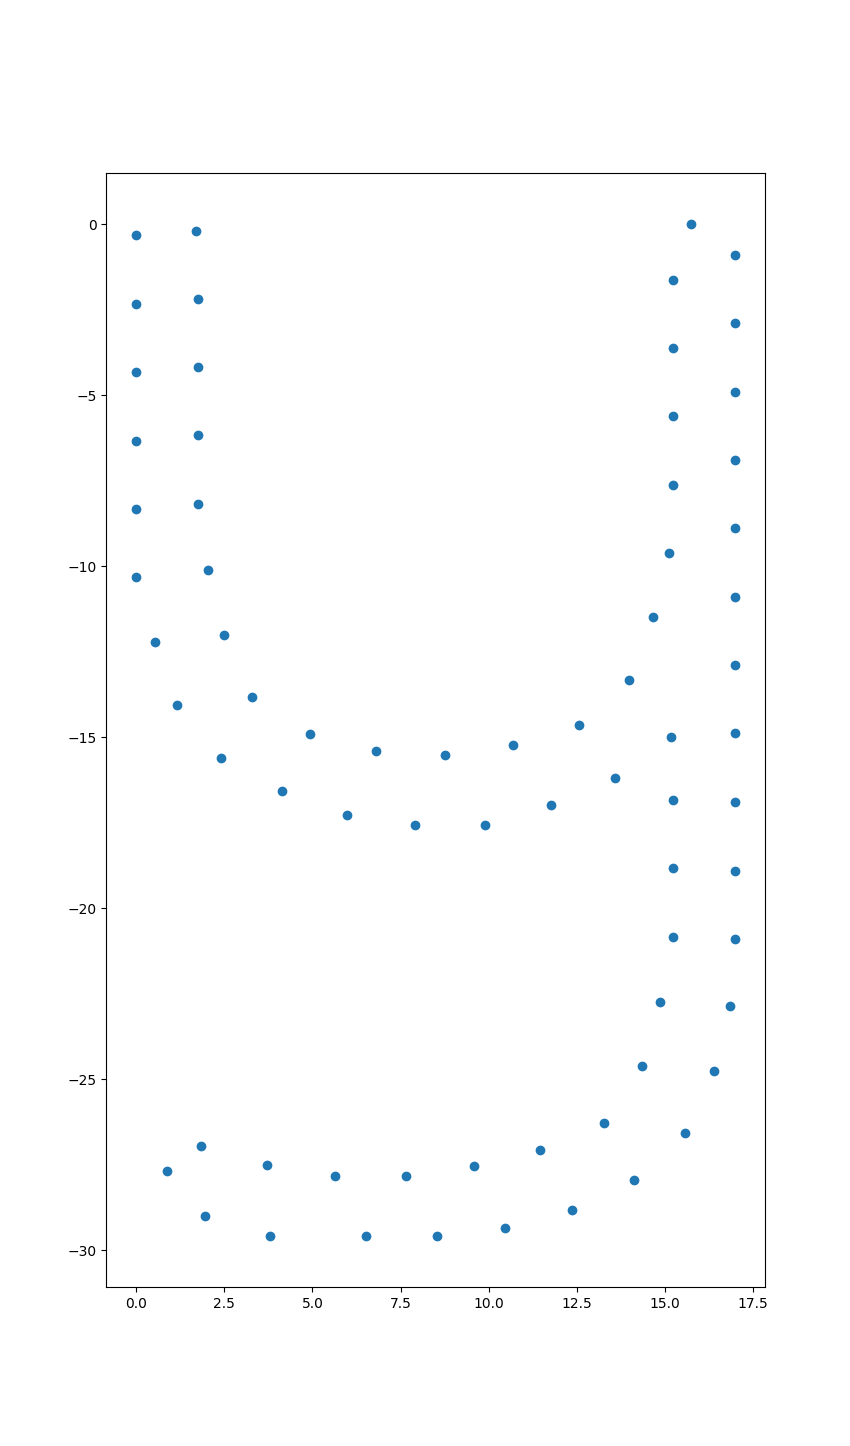

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

pressed: (0.874001707779883, -0.8123879579175437)

pressed: (0.9023721062618564, -1.8936776297433013)

pressed: (0.9023721062618564, -3.0334153919380284)

pressed: (0.9307425047438298, -4.20237719931723)

pressed: (0.9307425047438298, -5.546683277803311)

pressed: (0.9307425047438298, -6.744869130366993)

pressed: (0.9874833017077767, -7.972279028115153)

pressed: (1.01585370018975, -8.936672519202997)

pressed: (1.072594497153697, -10.017962191028758)

pressed: (1.2428168880455384, -11.04080377248556)

pressed: (1.4414096774193523, -12.034421308757882)

pressed: (1.8102248576850068, -12.881918619107804)

pressed: (2.235780834914609, -13.758639974642204)

pressed: (2.973411195445919, -14.606137284992126)

pressed: (3.6826711574952546, -15.278290324235169)

pressed: (4.78911669829222, -15.804323137555809)

pressed: (5.640228652751423, -16.18423572495405)

pressed: (6.718303795066415, -16.44725213161437)

pressed: (7.909860531309299, -16.564148312352287)

pressed: (9.044676470588238, -16

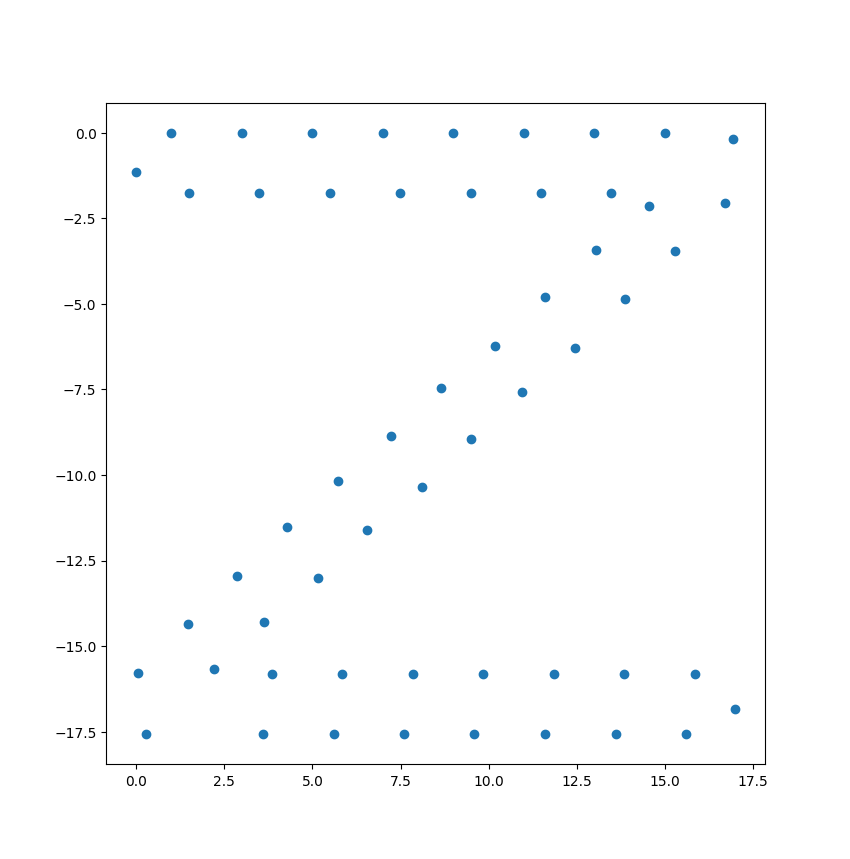

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

pressed: (0.7321497153700194, -0.9584772149093972)

pressed: (1.7251136622390901, -0.9877012600938784)

pressed: (2.6329664136622397, -0.8708050793559572)

pressed: (3.6826711574952573, -0.841581034171476)

pressed: (4.959339089184063, -0.8708050793559572)

pressed: (6.26437741935484, -0.841581034171476)

pressed: (7.399193358633779, -0.9000291245404384)

pressed: (8.64749089184061, -0.841581034171476)

pressed: (10.12275161290323, -0.841581034171476)

pressed: (11.399419544592034, -0.8123569889869984)

pressed: (12.505865085388999, -0.7831329438025172)

pressed: (13.782533017077805, -0.7831329438025172)

pressed: (15.030830550284636, -0.8708050793559572)

pressed: (16.080535294117656, -0.9877012600938784)

pressed: (15.62660891840608, -1.9228707059972372)

pressed: (15.115941745730554, -2.7703680163471596)

pressed: (14.293200189753327, -3.617865326697082)

pressed: (13.186754648956361, -4.640706908153884)

pressed: (12.392383491461105, -5.634324444426204)

pressed: (11.22919715370019

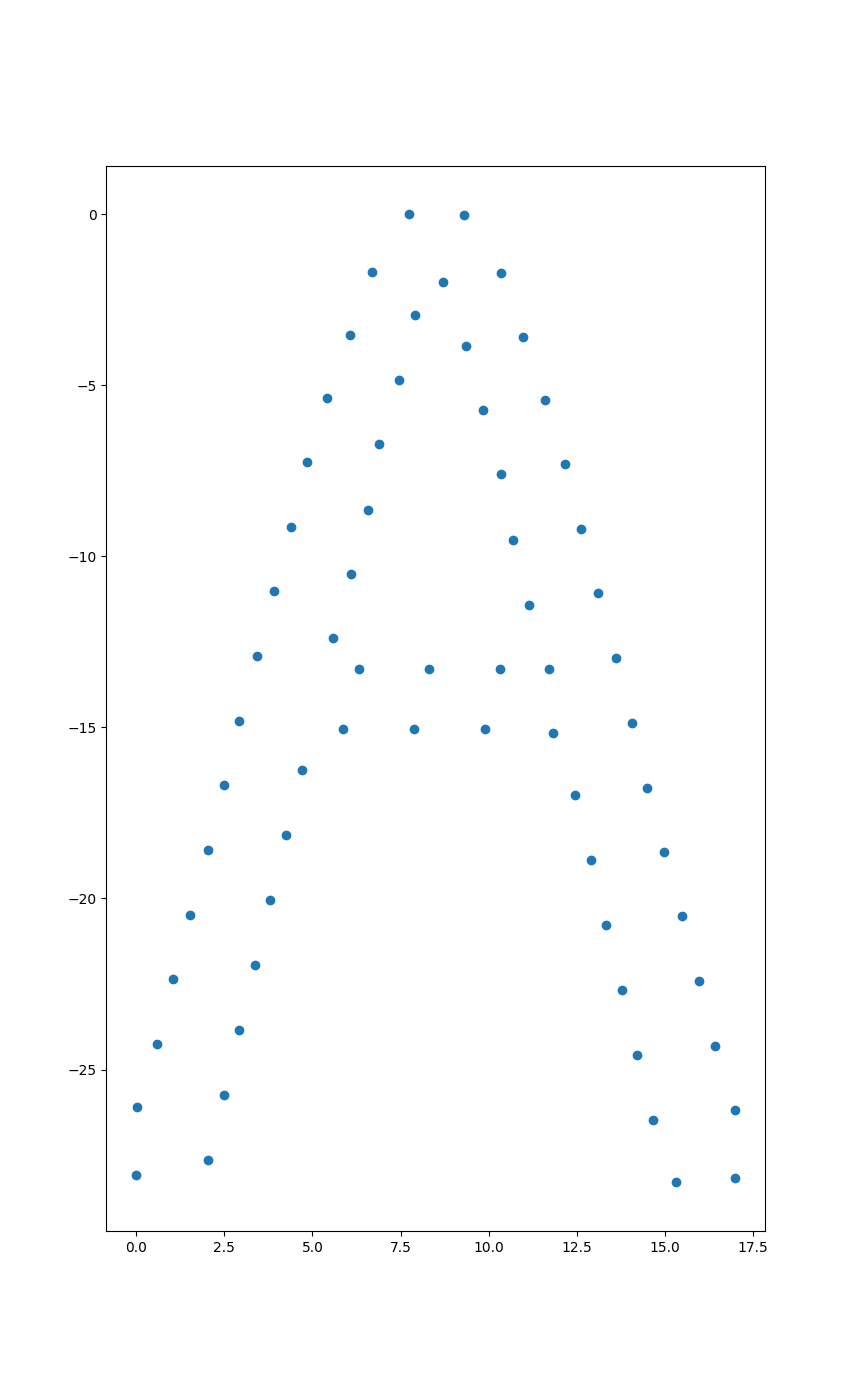

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='undo point', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

finished


In [ ]:
out_arr = []
labeler = Labeler(all_letters, letter_scales, out_arr)
labeler.label_letter()

In [11]:
out_dict = {}
for i, letterStrokes in enumerate(out_arr):
    letter = files[i]
    out_dict[letter] = {
        "points": letterStrokes,
        "dims": get_dims(all_letters[i])
    }

In [12]:
import json
with open('trace_points.json', 'w') as f:
    json.dump(out_dict, f)